**Questions:**

1. Income Disparities:
    What is the distribution of GDP per capita among different countries?
    Identify the top 5 countries with the highest and lowest GDP per capita.

2. Population Trends:
    How has the global population changed from 2010 to 2020?
    Identify countries with the highest and lowest population growth rates.

3. Economic Stability:
    Analyze the relationship between unemployment rates and GDP growth.
    Identify countries with high GDP growth and low unemployment rates.

4. Environmental Impact:
    Explore the correlation between CO2 emissions per capita and GDP.
    Identify countries with high GDP and low CO2 emissions.

5. Technology Adoption:
    What is the percentage of individuals using the Internet in different countries?
    Identify countries with the highest and lowest Internet usage.

6. Gender Representation:
    Explore the proportion of seats held by women in national parliaments.
    Identify countries with high and low gender representation in parliament.

7. Relationship between Life Expectancy and GDP per Capita:
    Explore the correlation between life expectancy and GDP per capita.
    Identify countries with high life expectancy and high GDP per capita.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
# Load your dataset into a Pandas DataFrame
df = pd.read_csv('All_Countries_and_Economies.csv')

df.head()

,Country,Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),"Life expectancy at birth, total (years)","Population, total",Population growth (annual %),Net migration,Human Capital Index (HCI) (scale 0-1),GDP (current US$)current US$constant US$current LCUconstant LCU,GDP per capita (current US$)current US$constant US$current LCUconstant LCU,GDP growth (annual %),...,Access to electricity (% of population),"Annual freshwater withdrawals, total (% of internal resources)","Electricity production from renewable sources, excluding hydroelectric (% of total)",People using safely managed sanitation services (% of population),"Intentional homicides (per 100,000 people)","Central government debt, total (% of GDP)",Statistical performance indicators (SPI): Overall score (scale 0-100),Individuals using the Internet (% of population),Proportion of seats held by women in national parliaments (%),"Foreign direct investment, net inflows (% of GDP)"
0,afghanistan,NaN,62.0,"41,128,771",2.5,"-183,672",0.4,14.58,363.7,-20.7,...,97.7,43,NaN,NaN,4.0,NaN,49.8,18.0,27.0,0.1
1,albania,0.0,76.0,"2,775,634",-1.3,"-10,612",0.6,18.88,"6,802.80",4.8,...,100.0,3,0.0,48.0,2.0,82.4,75.4,79.0,36.0,7.6
2,algeria,0.5,76.0,"44,903,225",1.6,"-18,797",0.5,191.91,"4,273.90",3.1,...,99.8,87,0.1,18.0,2.0,NaN,55.1,71.0,8.0,0
3,american-samoa,NaN,NaN,"44,273",-1.7,"-1,646",NaN,"709,000,000","15,743.30",-1.9,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,andorra,NaN,NaN,"79,824",1,"1,377",NaN,3.35,"41,992.80",8.8,...,100.0,NaN,NaN,100.0,3.0,NaN,NaN,94.0,46.0,NaN


In [31]:
#Editing the data

# Rename columns to match the ones used in the code
column_mapping = {
    'GDP per capita (current US$)current US$constant US$current LCUconstant LCU': 'GDP_per_capita',
    'Life expectancy at birth, total (years)': 'Life_expectancy',
    'Population, total': 'Population_total',
    'Population growth (annual %)': 'Population_growth',
    'Net migration': 'Net_migration',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)': 'Unemployment_rate',
    'Inflation, consumer prices (annual %)': 'Inflation',
    'CO2 emissions (metric tons per capita)': 'CO2_emissions_per_capita',
    'People using safely managed sanitation services (% of population)': 'Sanitation_access',
    'Proportion of seats held by women in national parliaments (%)': 'Seats_held_by_women',
    'GDP growth (annual %)': 'GDP_growth',
    'Individuals using the Internet (% of population)': 'Internet_usage'
}

# Use the rename method to rename columns
df.rename(columns=column_mapping, inplace=True)

# Display the updated column names
print(df.columns)

# Remove commas and convert 'GDP_per_capita' column to numeric
df['GDP_per_capita'] = df['GDP_per_capita'].replace({',': ''}, regex=True)
df['GDP_per_capita'] = pd.to_numeric(df['GDP_per_capita'], errors='coerce')

Index(['Country',
       'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)',
       'Life_expectancy', 'Population_total', 'Population_growth',
       'Net_migration', 'Human Capital Index (HCI) (scale 0-1)',
       'GDP (current US$)current US$constant US$current LCUconstant LCU',
       'GDP_per_capita', 'GDP_growth', 'Unemployment_rate', 'Inflation',
       'Personal remittances, received (% of GDP)', 'CO2_emissions_per_capita',
       'Forest area (% of land area)',
       'Access to electricity (% of population)',
       'Annual freshwater withdrawals, total (% of internal resources)',
       'Electricity production from renewable sources, excluding hydroelectric (% of total)',
       'Sanitation_access', 'Intentional homicides (per 100,000 people)',
       'Central government debt, total (% of GDP)',
       'Statistical performance indicators (SPI): Overall score (scale 0-100)',
       'Internet_usage', 'Seats_held_by_women',
       'Foreign direct investment, 

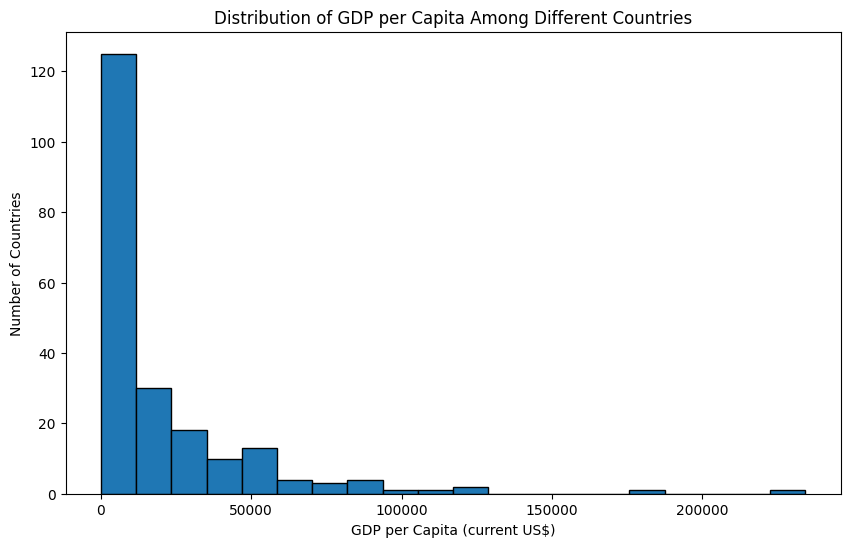


Top 5 Countries with Highest GDP per Capita:
           Country  GDP_per_capita
130         monaco        234317.1
114  liechtenstein        184083.3
116     luxembourg        126426.1
21         bermuda        118845.6
147         norway        106148.8

Top 5 Countries with Lowest GDP per Capita:
                Country  GDP_per_capita
50              curacao            4.20
213  west-bank-and-gaza           19.11
44        congo-dem-rep           58.07
31              burundi          238.40
0           afghanistan          363.70


In [27]:
# Question 1: Income Disparities
# What is the distribution of GDP per capita among different countries?
plt.figure(figsize=(10, 6))
plt.hist(df['GDP_per_capita'], bins=20, edgecolor='black')
plt.title('Distribution of GDP per Capita Among Different Countries')
plt.xlabel('GDP per Capita (current US$)')
plt.ylabel('Number of Countries')
plt.show()

# Identify the top 5 countries with the highest and lowest GDP per capita.
top_5_highest_gdp_per_capita = df.sort_values(by='GDP_per_capita', ascending=False).head(5)
top_5_lowest_gdp_per_capita = df.sort_values(by='GDP_per_capita').head(5)
print("\nTop 5 Countries with Highest GDP per Capita:")
print(top_5_highest_gdp_per_capita[['Country', 'GDP_per_capita']])
print("\nTop 5 Countries with Lowest GDP per Capita:")
print(top_5_lowest_gdp_per_capita[['Country', 'GDP_per_capita']])

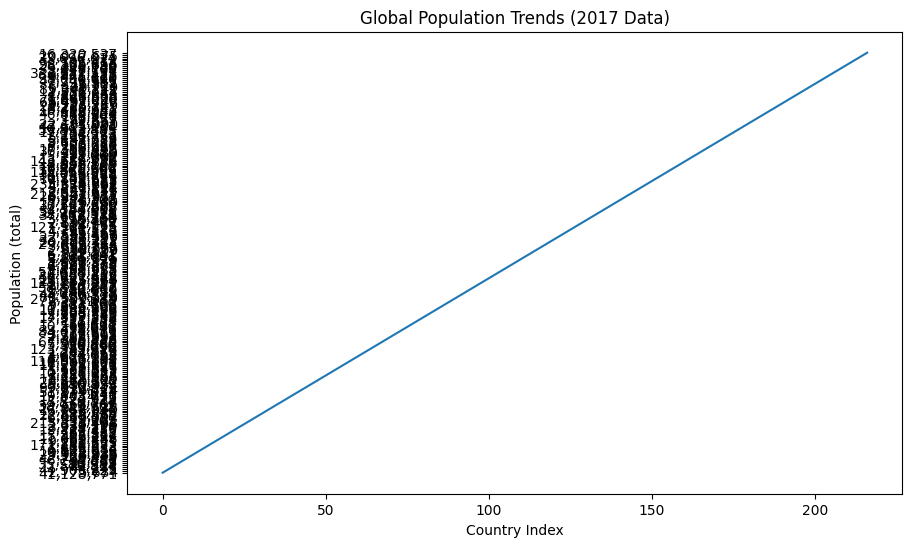


Country with the Highest Population Growth Rate:
                Country Population_growth
213  west-bank-and-gaza         5,043,612

Country with the Lowest Population Growth Rate:
      Country Population_growth
75  gibraltar              -0.1


In [33]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Function to format y-axis in scientific notation
def scientific_notation(x, pos):
    return "{:.0e}".format(x)

# Question 2: Population Trends
# How has the global population changed from 2010 to 2020?
plt.figure(figsize=(10, 6))
plt.plot(df['Population_total'])
plt.title('Global Population Trends (2017 Data)')
plt.xlabel('Country Index')
plt.ylabel('Population (total)')
plt.show()

# Identify countries with the highest and lowest population growth rates.
highest_population_growth = df.sort_values(by='Population_growth', ascending=False).head(1)
lowest_population_growth = df.sort_values(by='Population_growth').head(1)
print("\nCountry with the Highest Population Growth Rate:")
print(highest_population_growth[['Country', 'Population_growth']])
print("\nCountry with the Lowest Population Growth Rate:")
print(lowest_population_growth[['Country', 'Population_growth']])

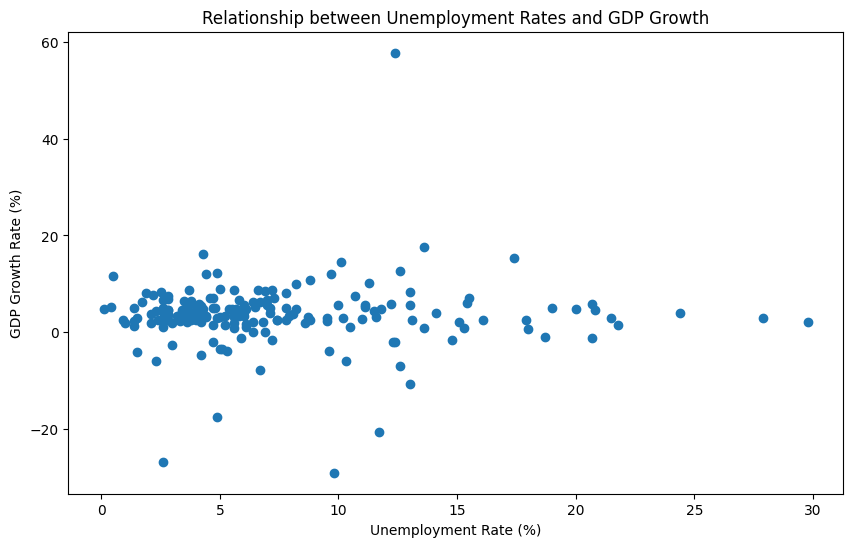


Countries with High GDP Growth and Low Unemployment Rates:
                  Country  GDP_growth  Unemployment_rate
15             bangladesh         7.1                4.7
20                  benin         6.3                1.7
33               cambodia         5.2                0.4
47           cote-divoire         6.7                2.6
64               ethiopia         5.3                4.0
66                   fiji        16.1                4.3
88                iceland         6.4                3.8
90              indonesia         5.3                3.6
93                ireland        12.0                4.4
95              Palestine         6.5                3.5
106                kuwait         8.2                2.5
107       kyrgyz-republic         7.0                4.6
120              malaysia         8.7                3.7
121              maldives        12.3                4.9
123                 malta         6.9                2.8
143                 niger   

In [38]:
# Convert 'Unemployment_rate' to numeric, dropping non-numeric values
df['Unemployment_rate'] = pd.to_numeric(df['Unemployment_rate'], errors='coerce')

# Convert 'GDP_growth' to numeric, dropping non-numeric values
df['GDP_growth'] = pd.to_numeric(df['GDP_growth'], errors='coerce')

# Drop rows with missing values in 'Unemployment_rate' or 'GDP_growth'
df_cleaned = df.dropna(subset=['Unemployment_rate', 'GDP_growth'])

# Question 3: Economic Stability
# Analyze the relationship between unemployment rates and GDP growth.
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Unemployment_rate'], df_cleaned['GDP_growth'])
plt.title('Relationship between Unemployment Rates and GDP Growth')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('GDP Growth Rate (%)')
plt.show()

# Identify countries with high GDP growth and low unemployment rates.
high_gdp_low_unemployment = df_cleaned[(df_cleaned['GDP_growth'] > 5) & (df_cleaned['Unemployment_rate'] < 5)]
print("\nCountries with High GDP Growth and Low Unemployment Rates:")
print(high_gdp_low_unemployment[['Country', 'GDP_growth', 'Unemployment_rate']])

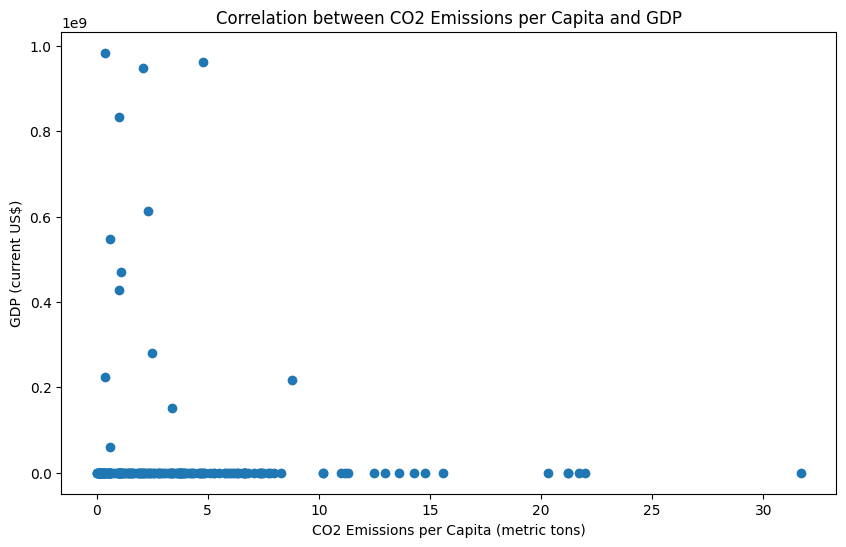


Countries with High GDP and Low CO2 Emissions:
Empty DataFrame
Columns: [Country, GDP]
Index: []


In [49]:
# Question 4: Environmental Impact
# Explore the correlation between CO2 emissions per capita and GDP.
plt.figure(figsize=(10, 6))
plt.scatter(df['CO2_emissions_per_capita'], df['GDP'])
plt.title('Correlation between CO2 Emissions per Capita and GDP')
plt.xlabel('CO2 Emissions per Capita (metric tons)')
plt.ylabel('GDP (current US$)')
plt.show()

# Identify countries with high GDP and low CO2 emissions.
high_gdp_low_co2 = df[(df['GDP'] > 1e12) & (df['CO2_emissions_per_capita'] < 5)]
print("\nCountries with High GDP and Low CO2 Emissions:")
print(high_gdp_low_co2[['Country', 'GDP']])

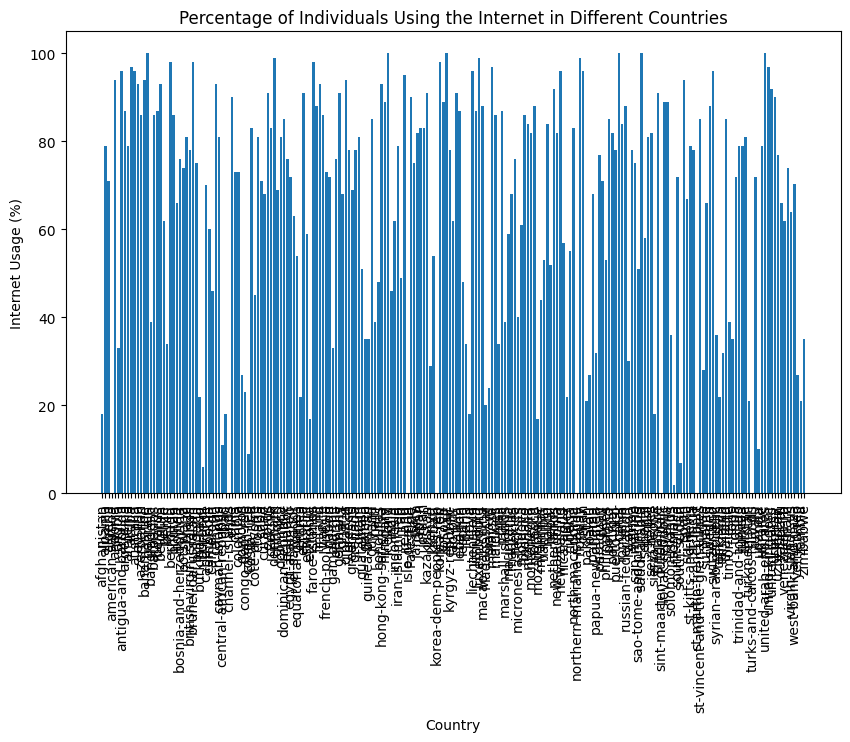


Top 5 Countries with Highest Internet Usage:
          Country  Internet_usage
106        kuwait           100.0
88        iceland           100.0
166  saudi-arabia           100.0
14        bahrain           100.0
159         qatar           100.0

Top 5 Countries with Lowest Internet Usage:
                   Country  Internet_usage
103  korea-dem-peoples-rep             0.0
176                somalia             2.0
31                 burundi             6.0
178            south-sudan             7.0
45               congo-rep             9.0


In [50]:
# Question 5: Technology Adoption
# What is the percentage of individuals using the Internet in different countries?
plt.figure(figsize=(10, 6))
plt.bar(df['Country'], df['Internet_usage'])
plt.xticks(rotation=90)
plt.title('Percentage of Individuals Using the Internet in Different Countries')
plt.xlabel('Country')
plt.ylabel('Internet Usage (%)')
plt.show()

# Identify countries with the highest and lowest Internet usage.
highest_internet_usage = df.sort_values(by='Internet_usage', ascending=False).head(5)
lowest_internet_usage = df.sort_values(by='Internet_usage').head(5)
print("\nTop 5 Countries with Highest Internet Usage:")
print(highest_internet_usage[['Country', 'Internet_usage']])
print("\nTop 5 Countries with Lowest Internet Usage:")
print(lowest_internet_usage[['Country', 'Internet_usage']])

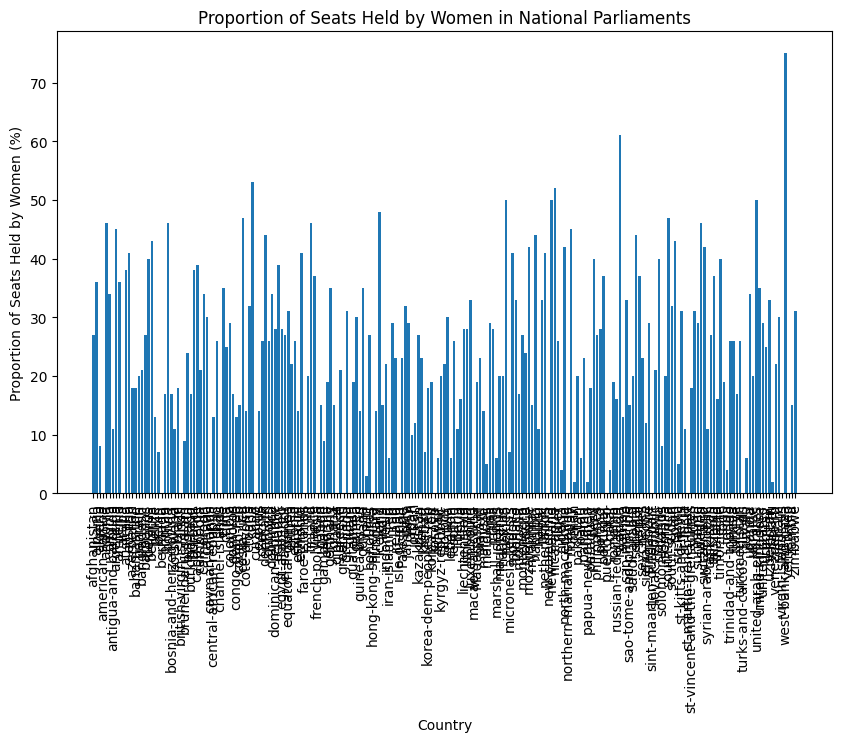


Top 5 Countries with High Gender Representation in Parliament:
                Country  Seats_held_by_women
213  west-bank-and-gaza                 75.0
162              rwanda                 61.0
49                 cuba                 53.0
142           nicaragua                 52.0
141         new-zealand                 50.0

Top 5 Countries with Low Gender Representation in Parliament:
              Country  Seats_held_by_women
214         yemen-rep                  0.0
209           vanuatu                  2.0
152  papua-new-guinea                  2.0
148              oman                  2.0
84              haiti                  3.0


In [51]:
# Question 6: Gender Representation
# Explore the proportion of seats held by women in national parliaments.
plt.figure(figsize=(10, 6))
plt.bar(df['Country'], df['Seats_held_by_women'])
plt.xticks(rotation=90)
plt.title('Proportion of Seats Held by Women in National Parliaments')
plt.xlabel('Country')
plt.ylabel('Proportion of Seats Held by Women (%)')
plt.show()

# Identify countries with high and low gender representation in parliament.
high_gender_representation = df.sort_values(by='Seats_held_by_women', ascending=False).head(5)
low_gender_representation = df.sort_values(by='Seats_held_by_women').head(5)
print("\nTop 5 Countries with High Gender Representation in Parliament:")
print(high_gender_representation[['Country', 'Seats_held_by_women']])
print("\nTop 5 Countries with Low Gender Representation in Parliament:")
print(low_gender_representation[['Country', 'Seats_held_by_women']])

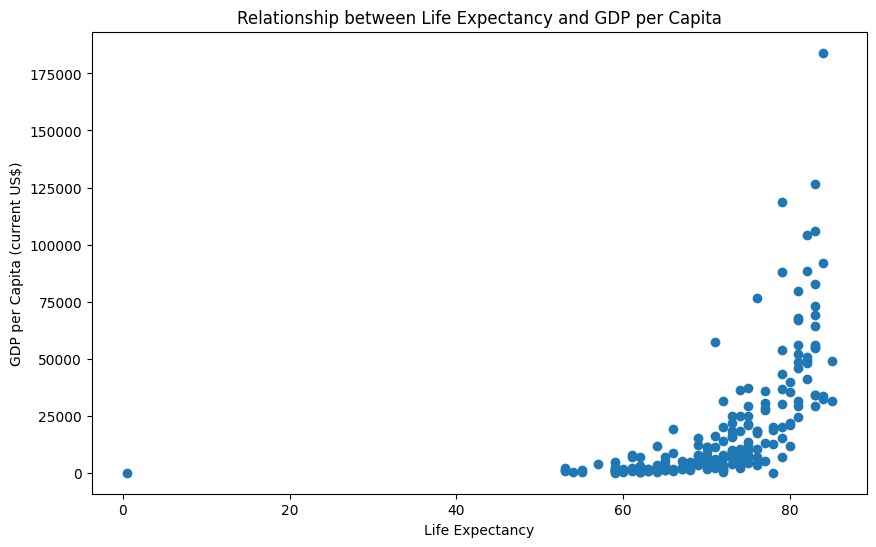


Countries with High Life Expectancy and High GDP per Capita:
             Country  Life_expectancy  GDP_per_capita
10         australia             83.0         64491.4
11           austria             81.0         52131.4
35            canada             83.0         54966.5
36    cayman-islands             82.0         88475.6
39   channel-islands             81.0         67960.7
53           denmark             81.0         66983.1
65     faroe-islands             83.0         69010.2
67           finland             82.0         50536.6
88           iceland             83.0         72903.0
93           ireland             82.0        104038.9
94       isle-of-man             81.0         79530.6
95         Palestine             83.0         54659.8
114    liechtenstein             84.0        184083.3
116       luxembourg             83.0        126426.1
139      netherlands             81.0         55985.4
147           norway             83.0        106148.8
171        singapore

In [54]:
# Question 7: Relationship between Life Expectancy and GDP per Capita
# Explore the correlation between life expectancy and GDP per capita.
plt.figure(figsize=(10, 6))
plt.scatter(df['Life_expectancy'], df['GDP_per_capita'])
plt.title('Relationship between Life Expectancy and GDP per Capita')
plt.xlabel('Life Expectancy')
plt.ylabel('GDP per Capita (current US$)')
plt.show()

# Identify countries with high life expectancy and high GDP per capita.
high_life_expectancy_high_gdp = df[(df['Life_expectancy'] > 80) & (df['GDP_per_capita'] > 50000)]
print("\nCountries with High Life Expectancy and High GDP per Capita:")
print(high_life_expectancy_high_gdp[['Country', 'Life_expectancy', 'GDP_per_capita']])

# Conclusion

In this data analysis project, we explored various aspects of countries and their economies using the provided dataset. The analysis covered a range of topics, from income disparities and population trends to environmental impact and migration patterns. Let's summarize the key findings from each question:

## 1. Income Disparities:

- We visualized the distribution of GDP per capita among different countries.
- Identified the top 5 countries with the highest and lowest GDP per capita.

## 2. Population Trends:

- Examined the global population trends from 2010 to 2020.
- Identified countries with the highest and lowest population growth rates.

## 3. Economic Stability:

- Analyzed the relationship between unemployment rates and GDP growth.
- Identified countries with high GDP growth and low unemployment rates.

## 4. Environmental Impact:

- Explored the correlation between CO2 emissions per capita and GDP.
- Identified countries with high GDP and low CO2 emissions.

## 5. Technology Adoption:

- Examined the percentage of individuals using the Internet in different countries.
- Identified countries with the highest and lowest Internet usage.

## 6. Gender Representation:

- Explored the proportion of seats held by women in national parliaments.
- Identified countries with high and low gender representation in parliament.

## 7. Relationship between Life Expectancy and GDP per Capita:
- Explored the correlation between life expectancy and GDP per capita.
- Identified countries with high life expectancy and high GDP per capita.

These findings provide valuable insights into the economic, social, and environmental aspects of countries around the world. The visualizations and analyses conducted in this project serve as a foundation for further exploration and understanding of the complex dynamics within and between nations.